# Visualizing distributions of data

任何分析或建模数据的工作的早期步骤都应该理解变量是如何分布的。分布可视化技术可以为许多重要问题提供快速的答案。observations 的范围是什么?他们的集中趋势是什么?它们是否向一个方向严重倾斜?有 bimodality 的证据吗?是否存在显著的异常值?这些问题的答案是否因其他变量定义的子集而异?

`distributions module` 包含几个函数，用于回答以下问题。`axis-level` 函数是 `histplot()`、`kdeplot()`、`ecdfplot()` 和 `rugplot()`。它们被组合在 figure-level 的 `displot()`、`jointplot()` 和 `pairplot()`函数中。

有几种不同的方法可以可视化分布，每种方法都有其相对的优点和缺点。了解这些因素是很重要的，这样你就可以为你的特定目标选择最好的方法。

## Plotting univariate histograms

也许最常见的可视化分布的方法是直方图。这是 `displot()` 中的默认方法，它使用与 `histplot()` 相同的底层代码。直方图是一种柱状图，其中表示数据变量的轴被划分为一组离散的 bins，每个 bins 中的观测数据的计数使用对应柱状图的高度显示：

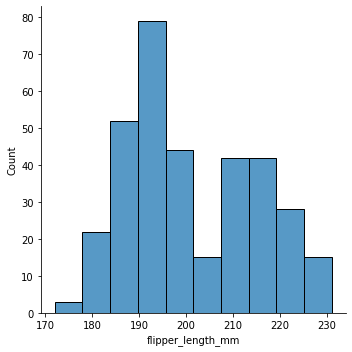

In [1]:
import seaborn as sns

penguins = sns.load_dataset("penguins")
sns.displot(penguins, x="flipper_length_mm")

这一 plot 立即提供了一些关于 `flipper_length_mm` 的见解。例如，我们可以看到，最常见的 flipper length 约为195毫米，但分布呈现双峰，所以这一数字并不能很好地代表数据。

## Choosing the bin size

bin 的大小是一个重要的参数，使用错误的 bin 大小可能会造成误导，因为它会模糊数据的重要特征，或者在随机可变性之外创建明显的特征。默认情况下， `displot()`/`histplot()` 基于 observation 的数量 和 数据的方差 选择默认的 bin 大小。但您不应该过分依赖这种自动方法，因为它们依赖于对数据结构的特定假设。检查您对不同 bin 大小的分布影响是否一致总是明智的。要直接选择大小，请设置 `binwidth` 参数:

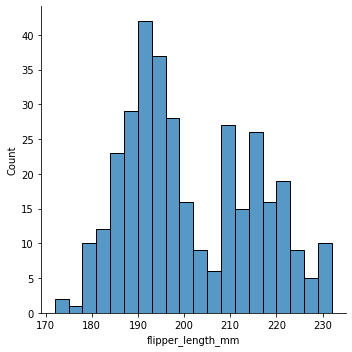

In [2]:
sns.displot(penguins, x="flipper_length_mm", binwidth=3)

在其他情况下，指定 bin 的数量可能比它们的大小更有意义:

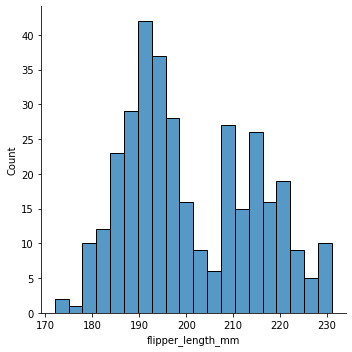

In [3]:
sns.displot(penguins, x="flipper_length_mm", bins=20)

一个默认失败的例子是当变量只接受相对较少的整数值时。在这种情况下，默认的 bin 宽度可能太小，在分布中造成了尴尬的空白：

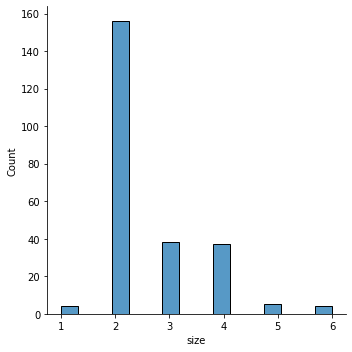

In [4]:
tips = sns.load_dataset("tips")
sns.displot(tips, x="size")

一种方法是通过向 bin 传递数组来指定精确的 bin break:

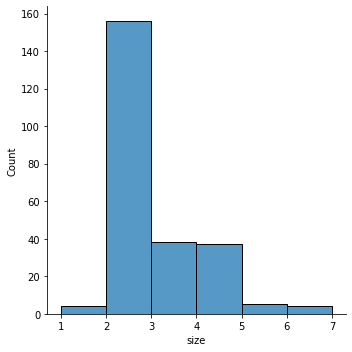

In [5]:
sns.displot(tips, x="size", bins=[1, 2, 3, 4, 5, 6, 7])

这也可以通过设置 `discrete=True` 来实现，它选择代表数据集中唯一值的 bin break，这些值的 bar 以它们对应的值为中心。

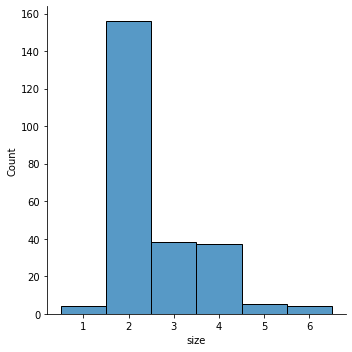

In [6]:
sns.displot(tips, x="size", discrete=True)

也可以使用直方图的逻辑来可视化 categorical 变量的分布。离散的 bin 自动设置为 categorical 变量，但它可能也有助于略微缩小 bars，以强调轴的 categorical 性质

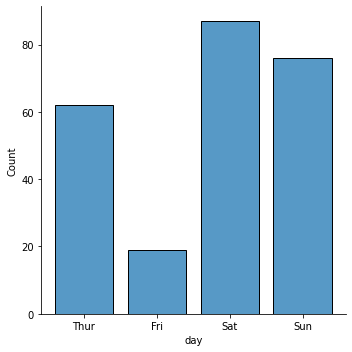

In [7]:
sns.displot(tips, x="day", shrink=.8)

## Conditioning on other variables

一旦您了解了一个变量的分布，下一步通常是询问该分布的特征在数据集中的其他变量之间是否有所不同。例如，我们上面看到的 flipper lengths 的双峰分布是如何解释的? `Displot()` 和 `histplot()` 通过 `hue` 语义提供对条件子集的支持。为 `hue` 分配一个变量将为其每个惟一值绘制单独的直方图，并按颜色区分它们


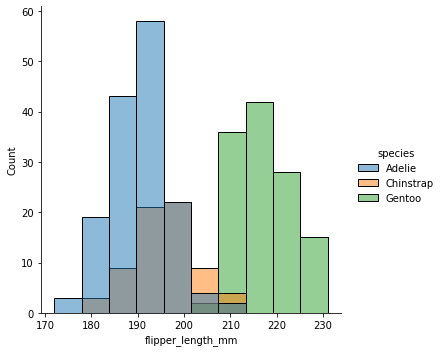

In [9]:
sns.displot(penguins, x="flipper_length_mm", hue="species")

默认情况下，不同的直方图是层叠在一起的，在某些情况下，它们可能很难区分。一种选择是将直方图的可视化表示从 bar 图更改为  “step”  图:

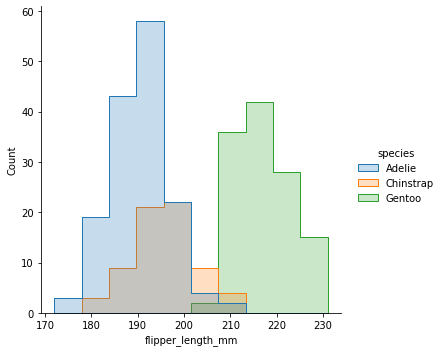

In [10]:
sns.displot(penguins, x="flipper_length_mm", hue="species", element="step")

另外，它们可以堆叠或垂直移动，而不是对每个 bar 进行分层。在这个图中，整个直方图的轮廓将与只有一个变量的图匹配:

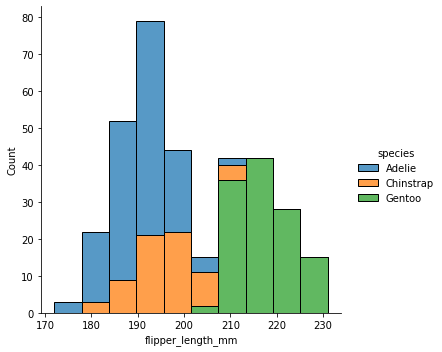

In [12]:
sns.displot(penguins, x="flipper_length_mm", hue="species", multiple="stack")

堆叠的直方图强调了变量之间的部分-整体关系，但它可能会掩盖其他特征(例如，难以确定 Adelie 分布的模式)。另一种选择是”dodge“ bar，这将使它们水平移动，并减少它们的宽度。这确保了没有重叠，并且在高度方面条形图保持可比性。但它只在分类变量只有少量层次时有效:

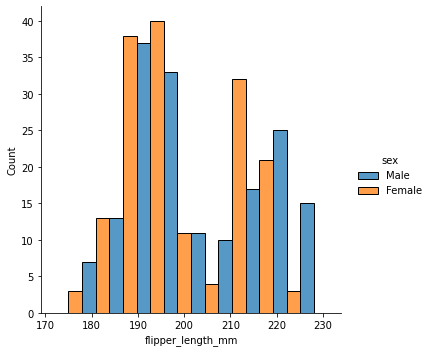

In [13]:
sns.displot(penguins, x="flipper_length_mm", hue="sex", multiple="dodge")

由于 `displot()` 是 figure-level 函数，并且绘制在 `FacetGrid` 上，因此也可以通过将第二个变量赋值给 `col` 或 `row` 而不是 `hue`，在单独的子图中绘制每个单独的分布。这很好地代表了每个子集的分布，但它使直接比较变得更加困难:

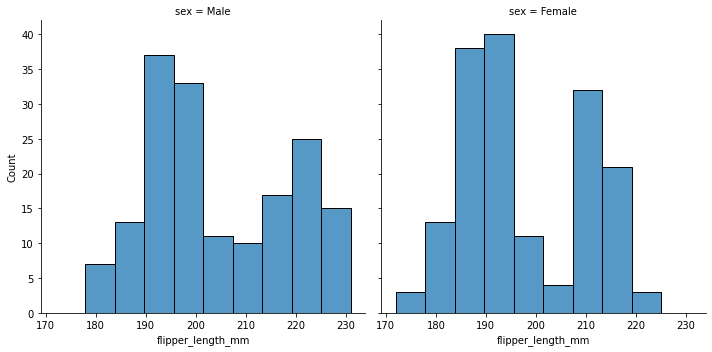

In [14]:
sns.displot(penguins, x="flipper_length_mm", col="sex")

这些方法都不是完美的，我们很快就会看到一些比直方图更适合比较任务的替代方法。

## Normalized histogram statistics

在此之前，另一点需要注意的是，当子集的观测值不相等时，就计数而言比较它们的分布可能不是理想的。一种解决方案是使用 `stat` 参数规范化计数:

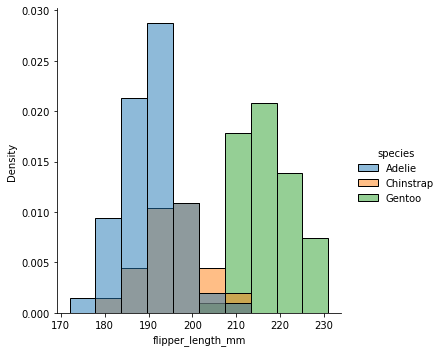

In [16]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density")

然而，默认情况下，规范化应用于整个分布，因此这只是重新缩放了 bar 的高度。通过设置 `common norm=False`，每个子集将被独立的规范化:

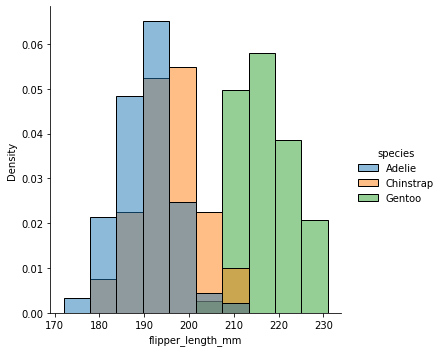

In [17]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="density", common_norm=False)

密度归一化使 bar 图的面积和为1。因此，密度轴是不能直接解释的。另一种选择是将 bar 图标准化，使其高度和为1。当变量是离散的时，这是最有意义的，但它是所有直方图的选项:

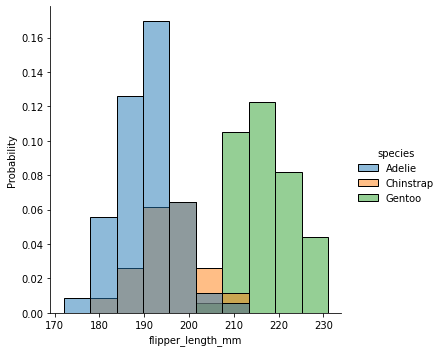

In [18]:
sns.displot(penguins, x="flipper_length_mm", hue="species", stat="probability")

## Kernel density estimation

直方图的目的是通过对观测数据进行分类和计数来近似产生数据的潜在概率密度函数。核密度估计(KDE)为同一问题提供了不同的解决方案。而不是使用离散的 bin，KDE图用高斯核平滑 observation，产生一个连续的密度估计:

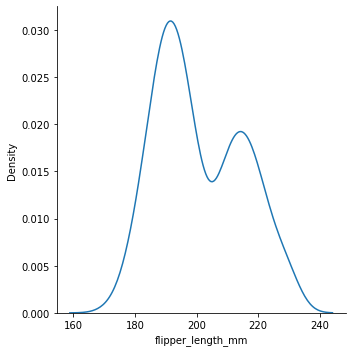

In [19]:
sns.displot(penguins, x="flipper_length_mm", kind="kde")

### Choosing the smoothing bandwidth

就像直方图中的bin大小一样，KDE准确表示数据的能力取决于平滑 bandwidth 的选择。过平滑估计可能会抹去有意义的特征，但欠平滑估计可能会在随机噪声中模糊真实形状。检查估计的鲁棒性最简单的方法是调整默认 bandwidth:


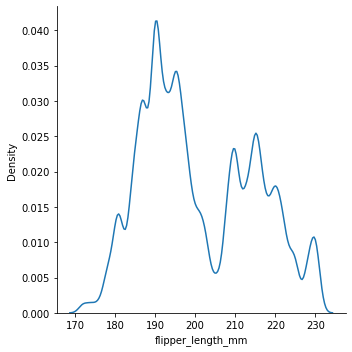

In [20]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=.25)

请注意，narrow bandwidth 使 bimodality 更加明显，但曲线却不那么平滑。相反，较大的带宽几乎完全掩盖了 bimodality:

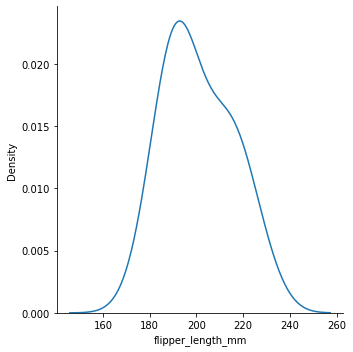

In [21]:
sns.displot(penguins, x="flipper_length_mm", kind="kde", bw_adjust=2)

### Conditioning on other variables

与直方图一样，如果您指定一个 `hue` 变量，将为该变量的每一级计算一个单独的密度估计值

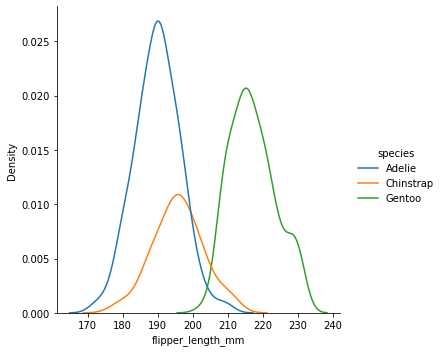

In [22]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde")

在许多情况下，分层的 KDE 比分层的直方图更容易解释，因此它通常是比较任务的好选择。然而，解决多个分布的许多相同选项也适用于KDE

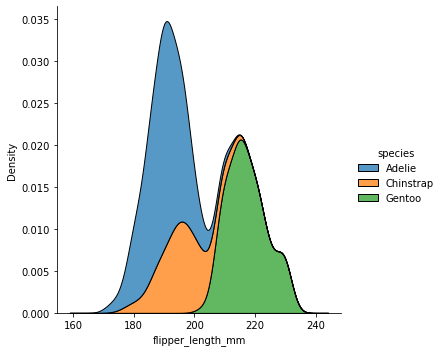

In [23]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", multiple="stack")

注意堆叠 plot 如何在默认情况下填充每个曲线之间的区域。也可以为单个或分层的密度填充曲线，尽管默认的alpha值(不透明度)将是不同的，这样单个密度更容易解决。

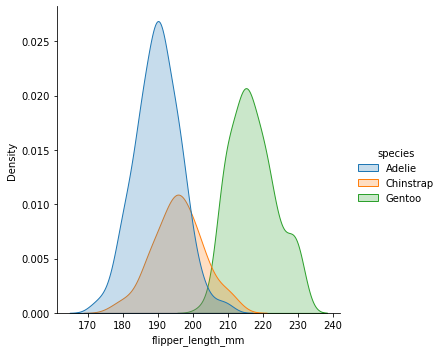

In [24]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)

### Kernel density estimation pitfalls

KDE plot 有许多优点。数据的重要特征很容易识别(central tendency, bimodality, skew)，它们提供了子集之间的容易比较。但是也存在 KDE 不能很好地表示底层数据的情况。这是因为 KDE 的逻辑假设底层分布是平滑且无界的。当一个变量反映的是一个自然有界的量时，这个假设可能会失败。如果有接近边界的观察值(例如，一个变量的小值不可能是负的)，KDE曲线可能会扩展到不真实的值：

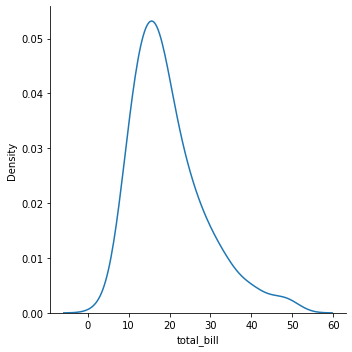

In [25]:
sns.displot(tips, x="total_bill", kind="kde")

使用 `cut` 参数可以部分避免这种情况，它指定曲线超出极限数据点的范围。但这只影响绘制曲线的位置;在没有数据存在的范围内，密度估计仍然会平滑，导致在分布的极端位置，密度会被人为压低:

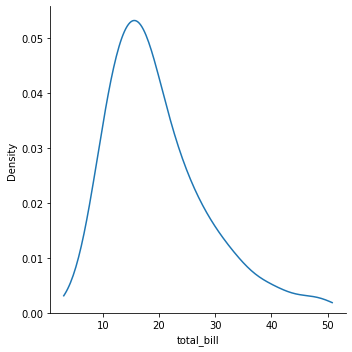

In [26]:
sns.displot(tips, x="total_bill", kind="kde", cut=0)

对于离散数据，或者当数据是自然连续的，但是特定的值被过度表示时，KDE方法也会失败。需要记住的重要一点是，KDE将始终向您显示一条平滑的曲线，即使数据本身并不平滑。例如，考虑一下钻石重量的分布:

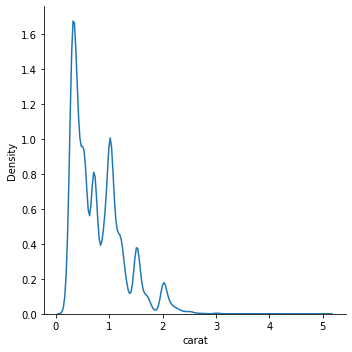

In [27]:
diamonds = sns.load_dataset("diamonds")
sns.displot(diamonds, x="carat", kind="kde")

虽然 KDE 表明在特定值周围有峰值，但直方图显示了一个更加参差的分布:

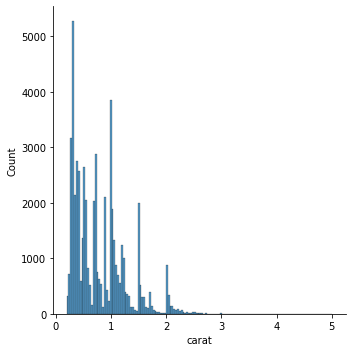

In [28]:
sns.displot(diamonds, x="carat")

作为折衷，可以将这两种方法结合起来。在直方图模式下，`displot()` (与 `histplot()` 一样)可以选择包括平滑的KDE曲线(注意 `kde=True`，而不是 `kind="kde"`):

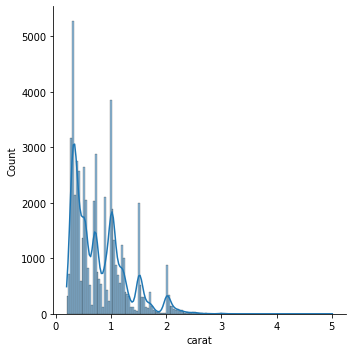

In [29]:
sns.displot(diamonds, x="carat", kde=True)

## Empirical cumulative distributions


可视化分布的第三个选项计算经验累积分布函数(ECDF)。该图通过每个数据点绘制一条单调递增的曲线，曲线的高度反映了较小值的观测数据所占的比例:

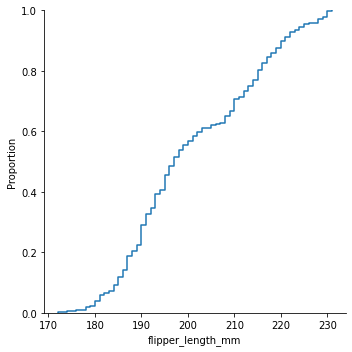

In [30]:
sns.displot(penguins, x="flipper_length_mm", kind="ecdf")

ECDF plot 有两个主要优势。与直方图或KDE不同，它直接表示每个数据点。这意味着不需要考虑 bin 大小或平滑参数。此外，由于曲线是单调递增的，它非常适合于比较多个分布:

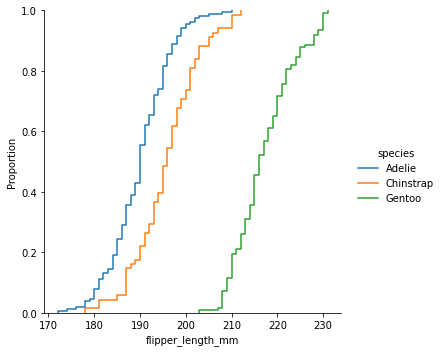

In [31]:
sns.displot(penguins, x="flipper_length_mm", hue="species", kind="ecdf")

ECDF图的主要缺点是，它不像直方图或密度曲线那样直观地表示分布的形状。考虑到 flipper lengths 的 bimodality 如何在直方图中立即显现，但要在 ECDF 图中看到它，您必须寻找不同的斜率。然而，通过实践，您可以通过检查ECDF来学习回答关于分布的所有重要问题，并且这样做可能是一种强大的方法。

## Visualizing bivariate distributions

到目前为止的所有例子都考虑了单变量分布:单个变量的分布，可能取决于分配给 `hue` 的第二个变量。然而，将第二个变量赋值给 y 将绘制一个二元分布:

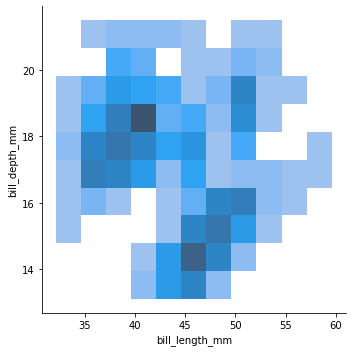

In [32]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm")

二元直方图将数据存储在平铺图形的矩形内，然后用填充颜色显示每个矩形内的观察计数(类似于 `heatmap()` )。类似地，二元KDE图用 2D 高斯曲线平滑 (x, y) 观察值。然后默认表示显示二维密度的轮廓: 

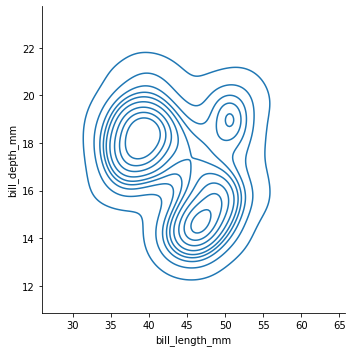

In [33]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde")

指定一个 `hue` 变量将使用不同的颜色绘制多个 heatmap 或轮廓集。对于二元直方图，这只在条件分布之间有最小重叠时有效

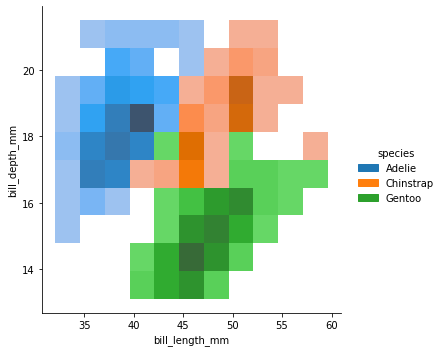

In [34]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species")

二元KDE图的等高线方法更适合于计算重叠，尽管有太多等高线的图可能会很乱:

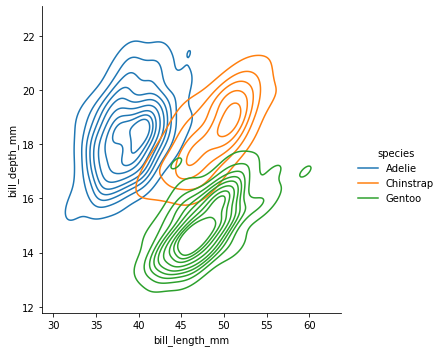

In [36]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", hue="species", kind="kde")

与单变量图一样，bin 大小或平滑 bandwidth 的选择将决定图如何很好地表示底层的双变量分布。应用相同的参数，但是可以通过传递一对值来对每个变量进行调优:

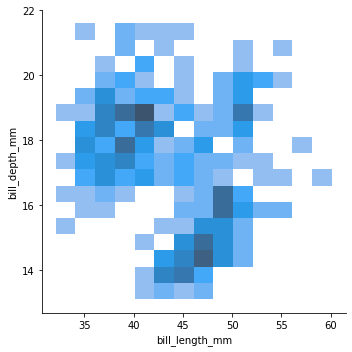

In [38]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5))

为了帮助解释 heatmap 图，添加一个颜色条来显示计数和颜色强度之间的映射:

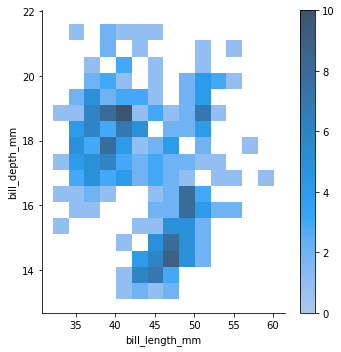

In [39]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", binwidth=(2, .5), cbar=True)

二元密度等高线的含义并不那么简单。因为密度是不能直接解释的，等值线是按密度的等比例绘制的，这意味着每条曲线都显示了一个水平集，密度的某些比例 p 位于它的下面。p 值是均匀分布的，由阈值参数控制的 lowest level 和由 levels 控制的数字:

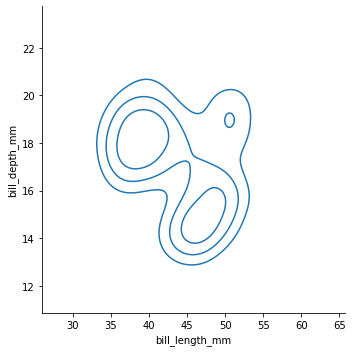

In [40]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", thresh=.2, levels=4)

levels 参数还接受一个值列表，以便进行更多的控制:

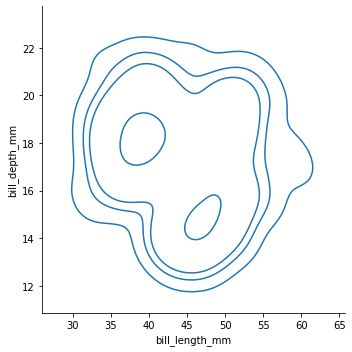

In [42]:
sns.displot(penguins, x="bill_length_mm", y="bill_depth_mm", kind="kde", levels=[.01, .05, .1, .8])

二元直方图允许一个或两个变量是离散的。绘制一个离散变量和一个连续变量的图提供了另一种比较条件单变量分布的方法

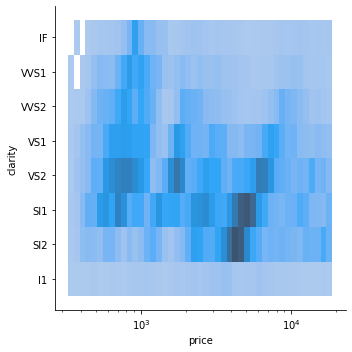

In [45]:
sns.displot(diamonds, x="price", y="clarity", log_scale=(True, False))

相反，绘制两个离散变量的图是一种简单的方法来显示观测的 cross-tabulation

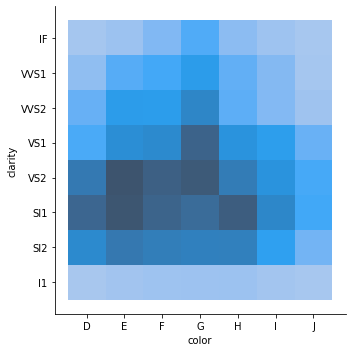

In [46]:
sns.displot(diamonds, x="color", y="clarity")

## Distribution visualization in other settings

seaborn中的其他几个 figure-level 函数使用了 `histplot()` 和 `kdeploy()` 函数。

### Plotting joint and marginal distributions

第一个是 `jointplot()`，它使用两个变量的边际分布扩展二元关系图或分布图。默认情况下，`jointplot()` 使用`scatterplot()` 表示二元分布，使用 `histplot()` 表示边际分布。

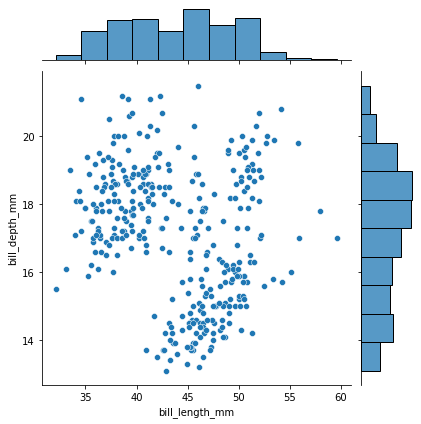

In [47]:
sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

与 `displot()` 类似，在 `jointplot()` 中设置不同 `kind="kde"` 将改变使用 `kdeploy()` 的 joint 和 margin 图

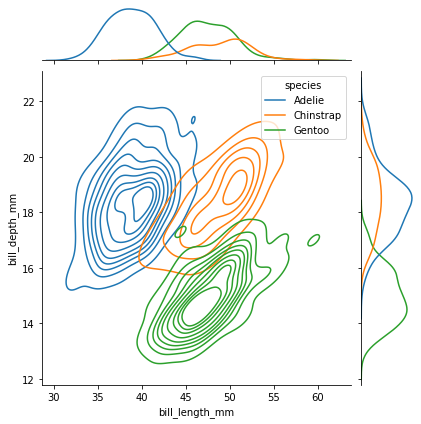

In [48]:
sns.jointplot(
    data=penguins,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde"
)

`jointplot()` 是 `JointGrid` 类的方便接口，在直接使用时提供了更大的灵活性:

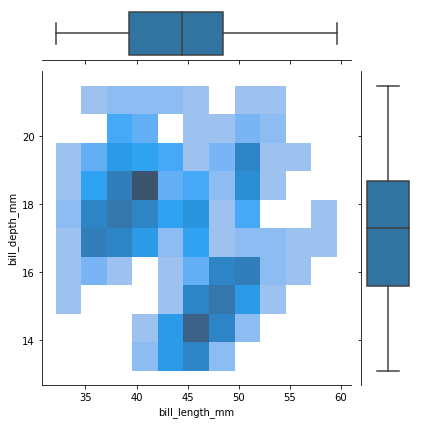

In [49]:
g = sns.JointGrid(data=penguins, x="bill_length_mm", y="bill_depth_mm")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)

显示边缘分布的一种 less-obtrusive 的方法是使用 "rug" plot，它在图的边缘添加一个小标记，以表示每个单独的观察。这内置在 `displot()` 中。

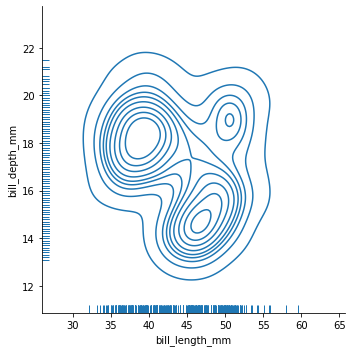

In [50]:
sns.displot(
    penguins, x="bill_length_mm", y="bill_depth_mm",
    kind="kde", rug=True
)

axes-level 级的 `rugplot()` 函数可用于在任何其他类型的绘图边上添加 rugs:

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

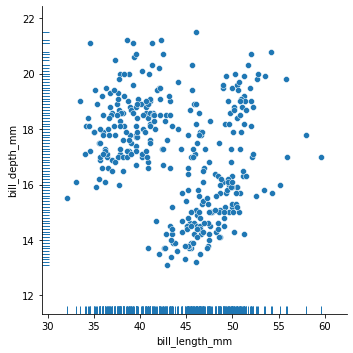

In [51]:
sns.relplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")
sns.rugplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

### Plotting many distributions

`pairplot()` 函数提供了类似的联合分布和边缘分布的混合。然而，`pairplot()` 不是关注单个关系，而是使用 “small-multiple”  方法来可视化数据集中所有变量的单变量分布以及它们的所有成对关系

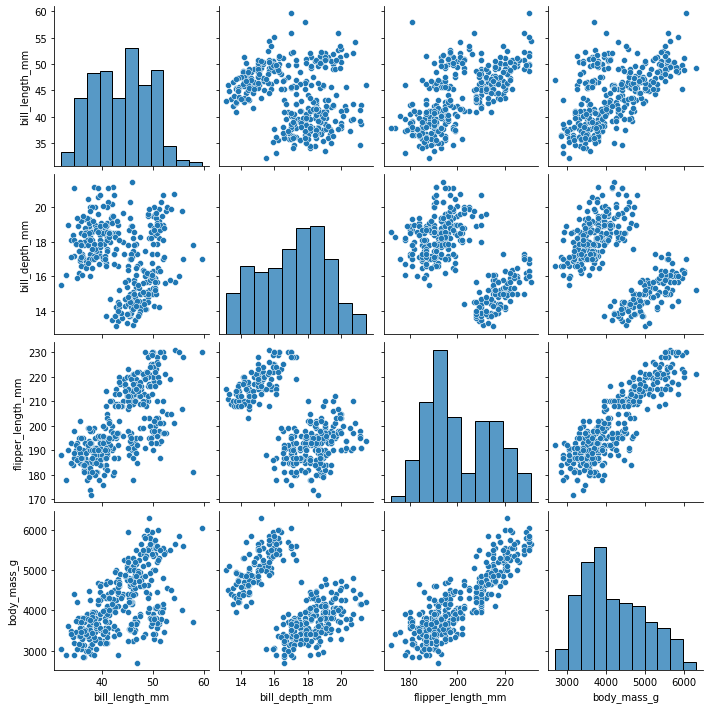

In [52]:
sns.pairplot(penguins)

如 `jointplot()` / `JointGrid`, 直接使用底层 `PairGrid` 将提供更多的灵活性，只需多一点类型:

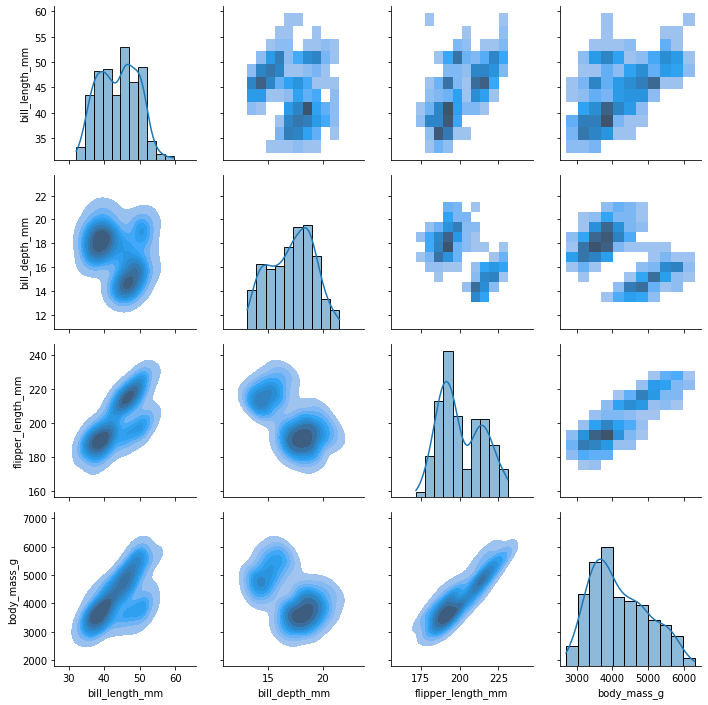

In [53]:
g = sns.PairGrid(penguins)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)